This python notebook follows neural networks tutorial series by Welch Labs.<br />
Link :- http://www.welchlabs.com/blog/2015/1/16/neural-networks-demystified-part-1-data-and-architecture# <br />

First lets define our data.<br />
X has two columns Hours_sleep and Hours_study. <br />
Y has score_on_test.<br />

In [1]:
import numpy as np

In [2]:
x = np.array(([3,5],[5,1],[10,2]), dtype = float)

In [3]:
y = np.array(([75],[82],[93]), dtype = float)

In [4]:
x

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [5]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

We want to predict score_on_test for new student given his/her Hours_sleep and Hours_study.<br />
So, this is a supervised regression problem.<br />
We are going to use neural networks. <br />
But, there is a problem now. That is input is in hours while output is between 0 to 100. <br />
*Solution:* We will scale our data so, our model will see only standardised units.

In [6]:
# Scaling inputs and output
x = x/np.amax(x, axis=0) 
# Here, axis=0 means take the max of each column and devide each element of that column by the max value

In [7]:
x

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [8]:
y = y/100 # Max test score is 100.

In [9]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

Now we will build the neural net.

Our input layer has two units(as two inputs), output layer has 1 unit and hidden layer has 3 units.

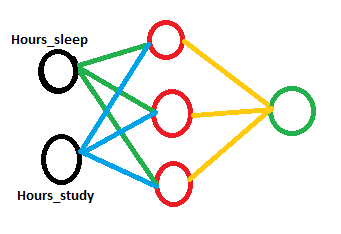

In [10]:
from IPython.display import Image
Image(filename="nn1.png")

![title](nn1.png)

Synapses = Take the input, multiply it by a specific weight and output the result.<br />
But, Neurons take outputs from other synapses, add them and apply an activation function.<br />

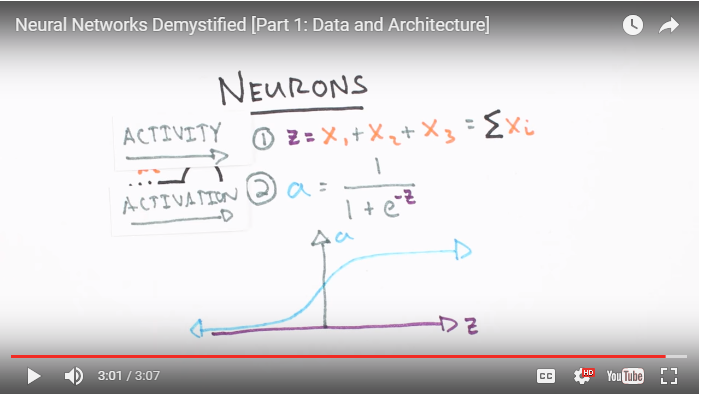

In [11]:
Image(filename="nn2.png") 
#Screenshot from welch labs tutorial

** We will use sigmoid activation function for our neural net. **

Lets build our neural net using python. <br />
We will build our network as a python class<br />
__init__ methode will take care of instantiating important constants and variables.<br />
We will make this variables accessible to whole class by placing a *self.* infront of each varaible name.<br />
Our network has two input, three hidden uint and one output unit.<br />

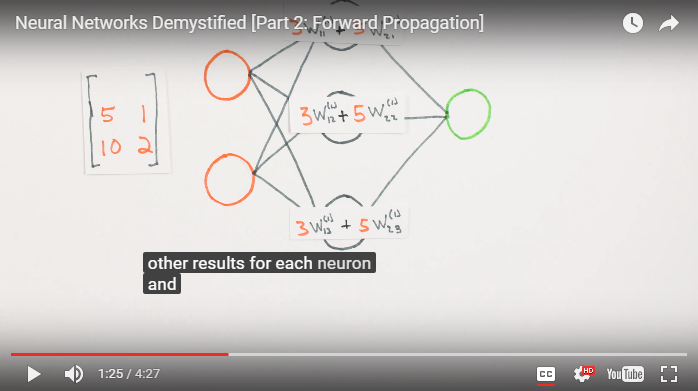

In [12]:
Image(filename="nn3.png") 

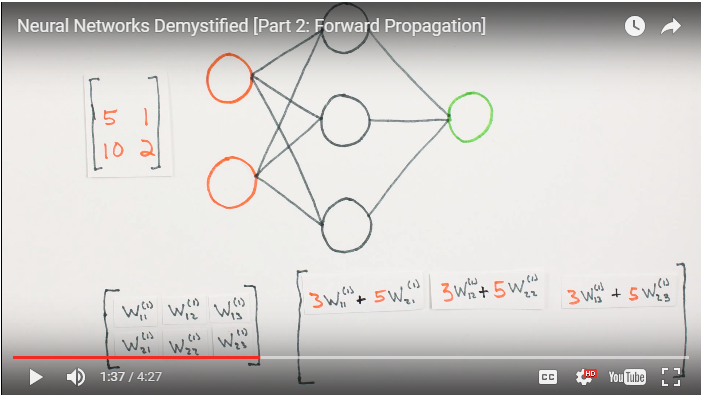

In [13]:
Image(filename="nn4.png") 

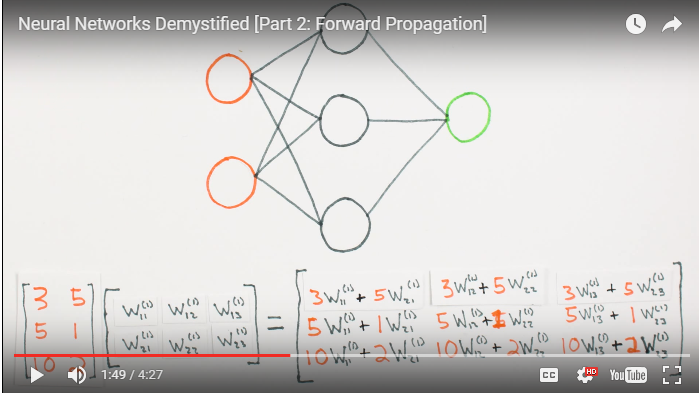

In [14]:
Image(filename="nn5.png") 

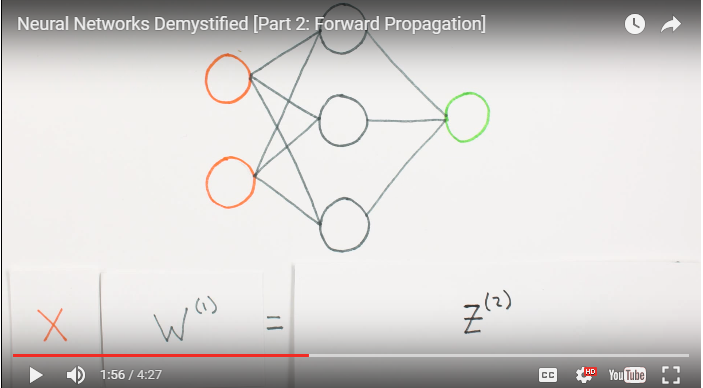

In [15]:
Image(filename="nn61.png") 

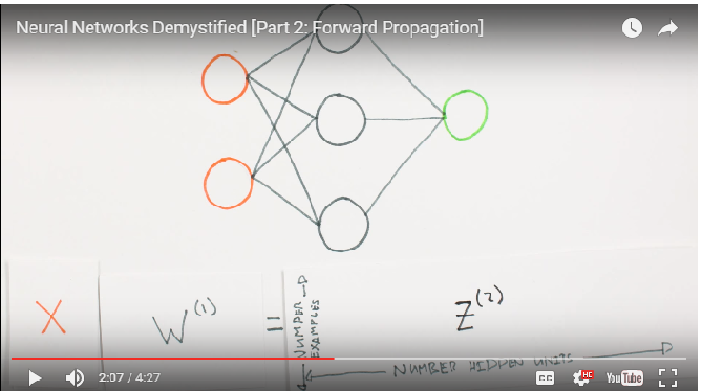

In [16]:
Image(filename="nn7.png") 

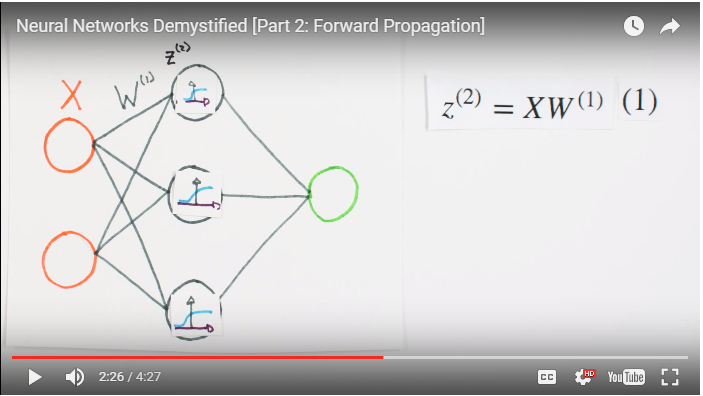

In [17]:
Image(filename="nn8.png") 

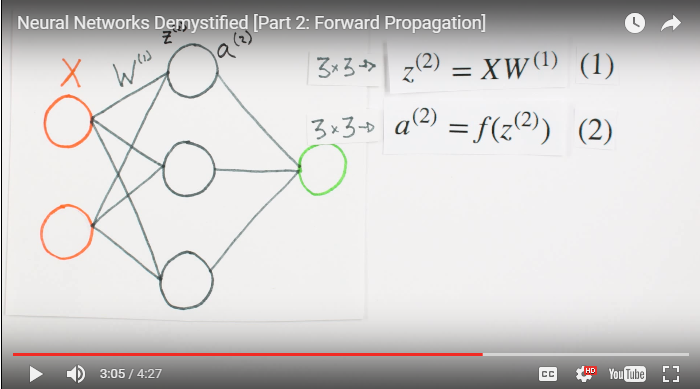

In [18]:
Image(filename="nn9.png") 

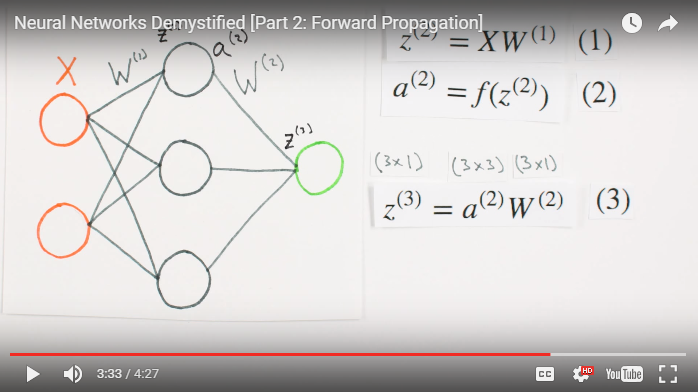

In [19]:
Image(filename="nn10.png") 

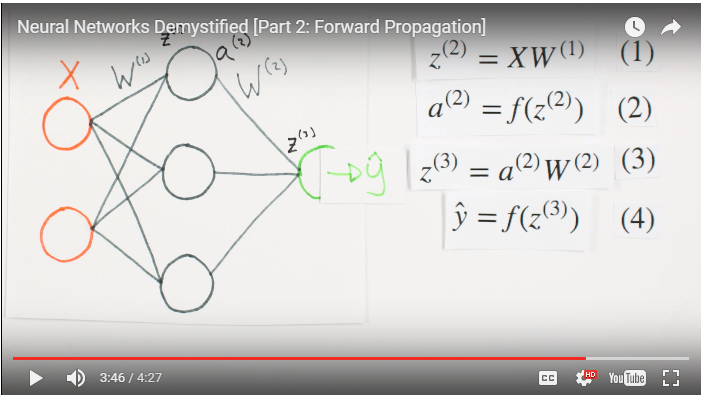

In [20]:
Image(filename="nn11.png") 

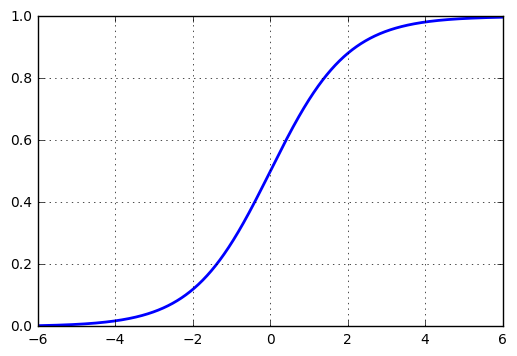

In [21]:
# Demonstartion of sigmoid function, not related to nn coding
def sigmoid(z):
        #Apply sigmoid function
        return 1/(1+np.exp(-z))

testInput = np.arange(-6,6,0.01)
import matplotlib.pyplot as plt
plt.plot(testInput, sigmoid(testInput), linewidth=2)
plt.grid(1)
plt.show()

Using numpy you can pass a scalar, a vector or a matrix to a sigmoid function.  <br />
Numpy will apply the activation function elementwise and return a result of same dimension as the input. <br />

In [22]:
sigmoid(1)

0.7310585786300049

In [23]:
sigmoid(np.array([-1,0,1]))

array([ 0.26894142,  0.5       ,  0.73105858])

In [24]:
sigmoid(np.random.randn(3,3))

array([[ 0.78255072,  0.1092313 ,  0.68572749],
       [ 0.63523232,  0.38232206,  0.80958381],
       [ 0.12019984,  0.43372031,  0.37610995]])

#### Implement the NN, forward propagation

In [25]:
class Neural_Network(object):
    def __init__(self):
        # Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights(Parameters)
        self.w1 = np.random.rand(self.inputLayerSize, \
                                 self.hiddenLayerSize)
        self.w2 = np.random.rand(self.hiddenLayerSize, \
                                 self.outputLayerSize)
        
    def forward(self, x):
        # propagate inputs through the network
        self.z2 = np.dot(x, self.w1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.w2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar or vector or matrix
        return 1/(1+np.exp(-z))
    

Now our NN class is ready. Now we will train our network.

## Training our Neural network -- Gradient descent

In [26]:
# Initialize the neural network. Call the forward function and predict yHat from NN.
NN = Neural_Network()
yHat = NN.forward(x)

In [27]:
yHat

array([[ 0.73550466],
       [ 0.72208941],
       [ 0.74350391]])

In [28]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

Well our predictions are pretty bad as we didnt train our NN.

How wrong our predictions are? We will do this with a cost function.<br />
It tells exactly how wrong or costly our model is.<br />
One way to compute cost function is take square of each error and sum it.<br />

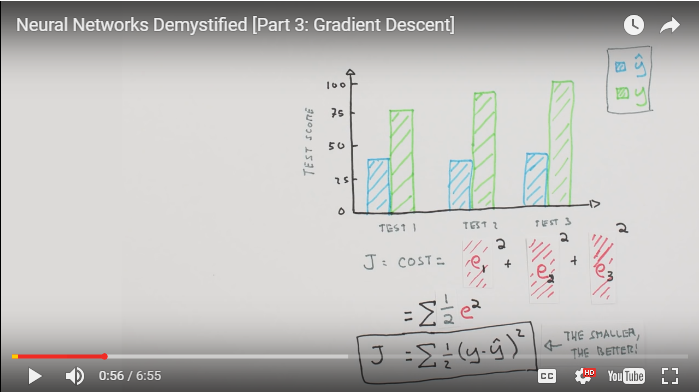

In [29]:
Image(filename="nn12.png") 

Training a network = We need to minimize this cost function J.

Our cost function is a function of input data and weights.<br />
While we cant control the inputs we have to change the weights.

** Curse of dimensionality **:-<br /> 

Lets say I have only one weight w. It can take 1000s of values.<br />
I can write a program to test these weights in NN to get best weight. But this can take more time.<br />

In [30]:
import time

weightsToTry = np.linspace(-5, 5, 1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.w1[0,0] = weightsToTry[i]
    yHat = NN.forward(x)
    costs[i] = 0.5*sum((y-yHat)**2)

endTime = time.clock()

In [31]:
timeElapsed = endTime-startTime
timeElapsed

0.030888860380585845

Lets take two weights and see how much time it will take:- <br />

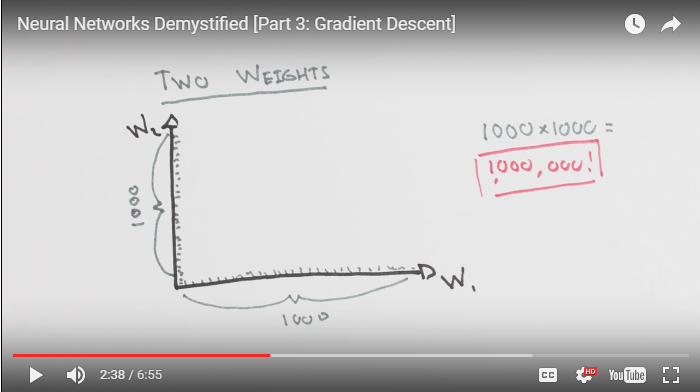

In [32]:
Image(filename="nn13.png") 

In [33]:
#from videoSupport import *
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.clock()
for i in range(1000):
    for j in range(1000):
        NN.w1[0,0] = weightsToTry[i]
        NN.w1[0,1] = weightsToTry[j]
        yHat = NN.forward(x)
        costs[i] = 0.5*sum((y-yHat)**2)

endTime = time.clock()

In [34]:
timeElapsed = endTime-startTime
timeElapsed

32.31116596108617

It took around 32 secondss for two weights :(

But we have 9 weights which will again take more time. <br />
So, a brute force optimisation algorithm is not going to work.

In [35]:
#We have below five equation

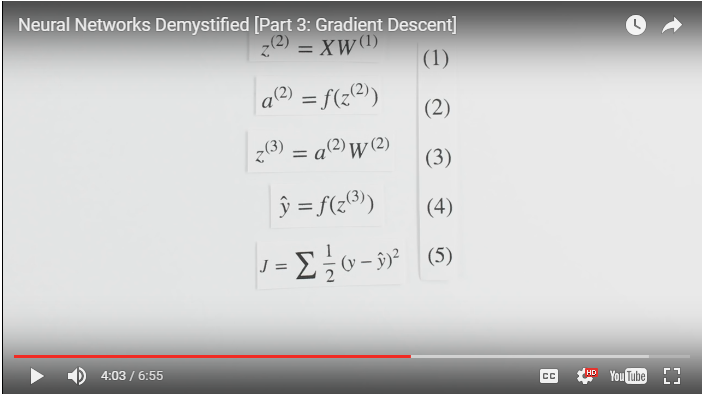

In [36]:
Image(filename="nn141.png") 

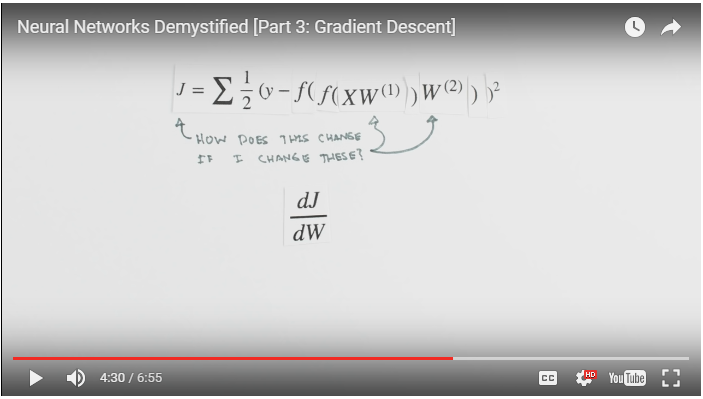

In [37]:
Image(filename="nn15.png") 

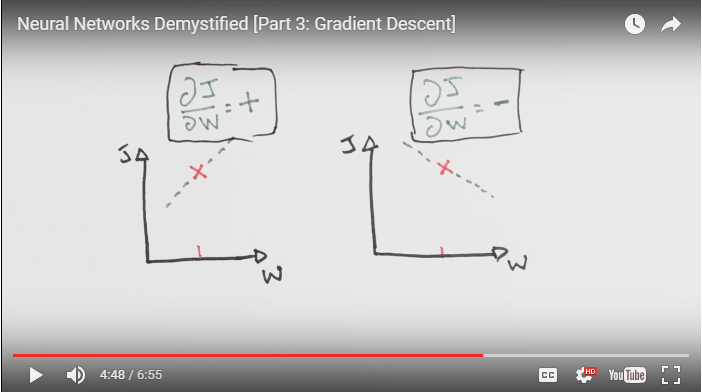

In [38]:
Image(filename="nn16.png") 

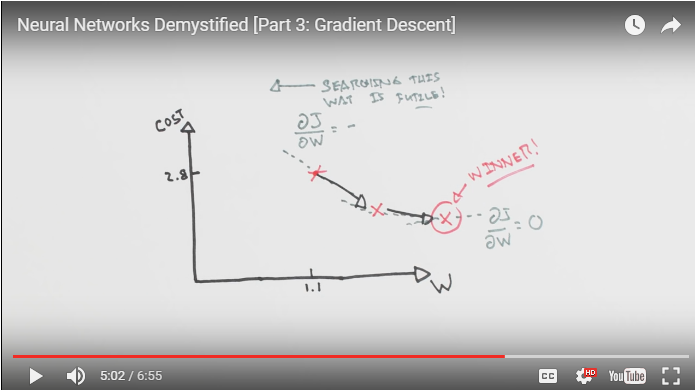

In [39]:
Image(filename="nn17.png") 

Rate of change of J w.r.t. w <br />
In this case for each value of w, so, partial derivative of w w.r.t. J <br />
If derivative is +ve, cost function is moving up the hill, if derivative is -ve, cost function is moving down the hill.<br />
Take steps iteratively down the hill till we reach derivative is minimum. <br />
This method is known as ** Gradient descent **<br /><br />

But gradient descent may go to alocal minima instead of a Global minimum. It is Non Convex problem.

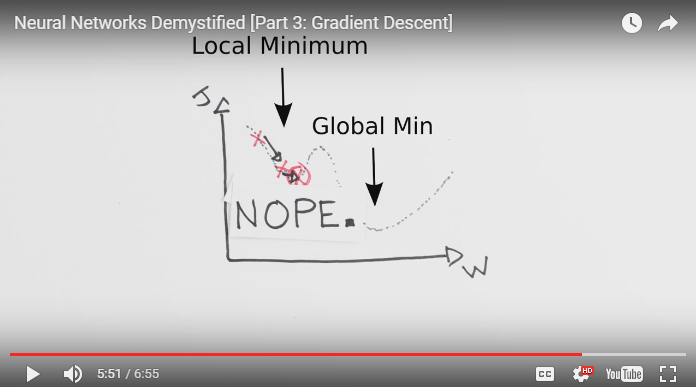

In [40]:
Image(filename="nn18.png") 

The solution to non convex is **Stochastic Gradient Descent** which uses examples one at a time instead of all at once<br />

For now we are going to do Gradient descent batch style:---- We will use all our examples at once.

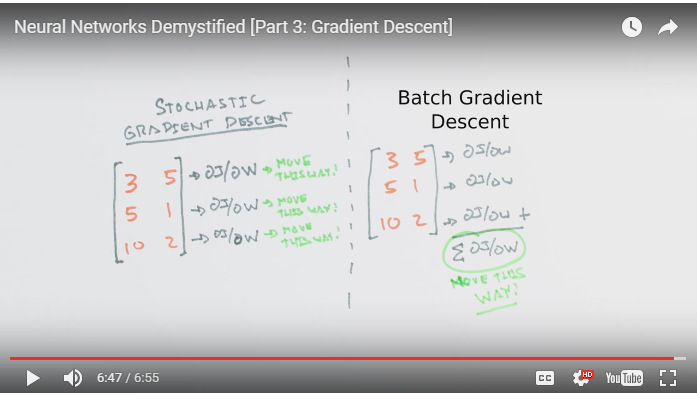

In [41]:
Image(filename="nn191.png") 